In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd  

In [ ]:
#The code for this assignment was generated with the help of ChatGPT

In [10]:
import os
os.getcwd()
os.listdir()

['Intro.ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'airbnb_hw.csv',
 'sqlite.ipynb',
 'r.ipynb',
 'cpp-smallpt.ipynb',
 'cpp-third-party-libs.ipynb',
 'cpp.ipynb',
 'Lorenz.ipynb']

In [64]:
#
#Q1)a)
# Load data
airbnb = pd.read_csv("./airbnb_hw.csv")

# Clean Price
airbnb["Price"] = (
    airbnb["Price"]
    .str.replace("$", "", regex=False)   # remove dollar sign
    .str.replace(",", "", regex=False)   # remove commas (important for prices > 999)
)

# Convert to numeric
airbnb["Price"] = pd.to_numeric(airbnb["Price"], errors="coerce")

# Number of missing values
print("Number of missing Price values:", airbnb["Price"].isna().sum())


Number of missing Price values: 0


In [72]:
#Q1)b)
mn = pd.read_csv("./mn_police_use_of_force.csv")

# Clean subject_injury
mn["subject_injury_clean"] = (
    mn["subject_injury"]
        .str.strip()
        .str.lower()
        .map({"yes": "Yes", "no": "No"})
)


# Proportion of missing values
prop_missing = mn["subject_injury_clean"].isna().mean()
print(f"Proportion missing: {prop_missing:.3f}")
print(f"Percent missing: {prop_missing*100:.1f}%")

# Cross-tabulation including missing values
print(pd.crosstab(
    mn["force_type"],
    mn["subject_injury_clean"],
    dropna=False
))

# Explicit check for missingness patterns
print(pd.crosstab(
    mn["force_type"],
    mn["subject_injury_clean"].isna()
))

Proportion missing: 0.762
Percent missing: 76.2%
subject_injury_clean           No   Yes   NaN
force_type                                   
Baton                           0     2     2
Bodily Force                 1093  1286  7051
Chemical Irritant             131    41  1421
Firearm                         2     0     0
Gun Point Display              33    44    27
Improvised Weapon              34    40    74
Less Lethal                     0     0    87
Less Lethal Projectile          1     2     0
Maximal Restraint Technique     0     0   170
Police K9 Bite                  2    44    31
Taser                         150   172   985
subject_injury_clean         False  True 
force_type                               
Baton                            2      2
Bodily Force                  2379   7051
Chemical Irritant              172   1421
Firearm                          2      0
Gun Point Display               77     27
Improvised Weapon               74     74
Less Lethal      

In [73]:
df = pd.read_csv('./Pretrial_data.csv',low_memory=False) #I downloaded the 2017 pretrial data on my own and uploaded it onto Jupyter notebook

df["WhetherDefendantWasReleasedPretrial"].value_counts(dropna=False)

WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64

In [77]:
# Clean and create dummy variable
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('./Pretrial_data.csv', low_memory=False)

# Check unique values
print(df["WhetherDefendantWasReleasedPretrial"].value_counts(dropna=False))

# Map the codes to clean dummy
df["ReleasedPretrial_clean"] = df["WhetherDefendantWasReleasedPretrial"].map({
    1: 1,        # Yes, released
    0: 0,        # No, not released
    9: np.nan    # Missing
})

# Check counts
print(df["ReleasedPretrial_clean"].value_counts(dropna=False))

# Missing count and proportion
missing_count = df["ReleasedPretrial_clean"].isna().sum()
missing_prop = df["ReleasedPretrial_clean"].isna().mean()

print(f"Missing count: {missing_count}")
print(f"Proportion missing: {missing_prop:.3f} ({missing_prop*100:.1f}%)")

WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64
ReleasedPretrial_clean
1.0    19154
0.0     3801
NaN       31
Name: count, dtype: int64
Missing count: 31
Proportion missing: 0.001 (0.1%)


In [88]:
mn = pd.read_csv("./mn_police_use_of_force.csv", low_memory=False)

# Clean subject_injury
mn["subject_injury_clean"] = (
    mn["subject_injury"]
        .str.strip()
        .str.lower()
        .map({"yes": "Yes", "no": "No"})
)

# Treat everything else (including blanks) as missing
mn.loc[~mn["subject_injury_clean"].isin(["Yes", "No"]), "subject_injury_clean"] = np.nan

# Missing count and proportion
missing_count = mn["subject_injury_clean"].isna().sum()
missing_prop = mn["subject_injury_clean"].isna().mean()

print("subject_injury counts:")
print(mn["subject_injury_clean"].value_counts(dropna=False))
print(f"Missing count: {missing_count}")
print(f"Proportion missing: {missing_prop:.3f} ({missing_prop*100:.1f}%)")

# Optional cross-tab with force_type
print("\nCross-tabulation with force_type:")
print(pd.crosstab(mn["force_type"], mn["subject_injury_clean"], dropna=False))


subject_injury counts:
subject_injury_clean
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64
Missing count: 9848
Proportion missing: 0.762 (76.2%)

Cross-tabulation with force_type:
subject_injury_clean           No   Yes   NaN
force_type                                   
Baton                           0     2     2
Bodily Force                 1093  1286  7051
Chemical Irritant             131    41  1421
Firearm                         2     0     0
Gun Point Display              33    44    27
Improvised Weapon              34    40    74
Less Lethal                     0     0    87
Less Lethal Projectile          1     2     0
Maximal Restraint Technique     0     0   170
Police K9 Bite                  2    44    31
Taser                         150   172   985


In [ ]:
#written explination 



In [82]:
sharks = pd.read_csv('Sharkattacks.csv', low_memory=False)

# Quick check
sharks.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254
0,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19th January,2026.0,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18th January,2026.0,Unprovoked,Australia,NSW,Nielsen Park Vaucluse Sydney Harbour,Jumping off rocks,Nico Antic,M,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10th January,2026.0,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# Drop columns that are entirely empty
sharks = sharks.dropna(axis=1, how='all')
print("Remaining columns:", sharks.columns.tolist())


Remaining columns: ['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ', 'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22']


Dataset shape after dropping empty columns: (39175, 23)
Year range: 0.0 to 2026.0


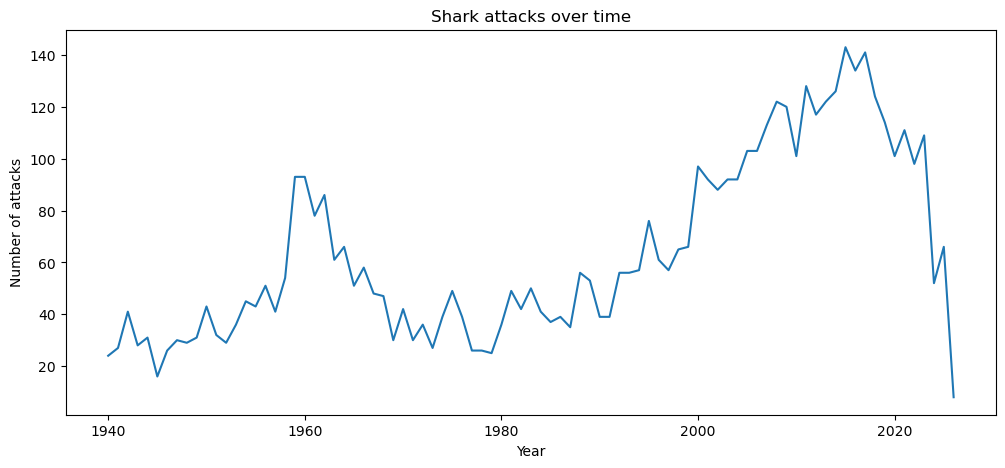

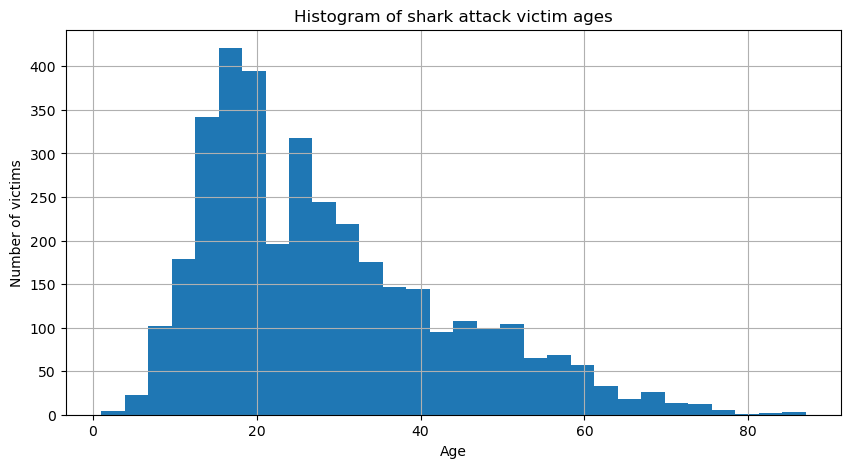

Proportion of victims who are male: 78.71%
Proportion of attacks that are unprovoked: 74.49%

Unprovoked attacks by sex:
Sex
M      0.815866
F      0.149685
NAN    0.034207
LLI    0.000243
Name: proportion, dtype: float64

Fatality rate by attack type:
Fatal_clean         N   Unknown         Y
Type_clean                               
Provoked     0.957935  0.017208  0.024857
Unknown      0.411699  0.449944  0.138358
Unprovoked   0.819020  0.012858  0.168122

Fatality rate by sex:
Fatal_clean         N   Unknown         Y
Sex                                      
F            0.791436  0.081492  0.127072
LLI          1.000000  0.000000  0.000000
M            0.774105  0.074151  0.151745
M X 2        0.000000  1.000000  0.000000
NAN          0.657080  0.174779  0.168142

Proportion of attacks by white sharks: 12.16%


In [109]:
sharks = pd.read_csv('Sharkattacks.csv', low_memory=False)
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load CSV
sharks = pd.read_csv('Sharkattacks.csv', low_memory=False)

# Strip column names
sharks.columns = sharks.columns.str.strip()

# Drop columns with all missing values
sharks = sharks.dropna(axis=1, how='all')
print("Dataset shape after dropping empty columns:", sharks.shape)

# 2. Year
sharks.loc[:, 'Year'] = pd.to_numeric(sharks['Year'], errors='coerce')
print("Year range:", sharks['Year'].min(), "to", sharks['Year'].max())

# Filter to attacks since 1940
sharks_recent = sharks.loc[sharks['Year'] >= 1940].copy()

# Attacks over time
attacks_by_year = sharks_recent['Year'].value_counts().sort_index()
attacks_by_year.plot(kind='line', figsize=(12,5), title='Shark attacks over time')
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.show()

# 3. Age
sharks_recent.loc[:, 'Age'] = pd.to_numeric(sharks_recent['Age'], errors='coerce')

plt.figure(figsize=(10,5))
sharks_recent['Age'].dropna().hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Number of victims')
plt.title('Histogram of shark attack victim ages')
plt.show()

# 4. Proportion male
sharks_recent.loc[:, 'Sex'] = sharks_recent['Sex'].astype(str).str.strip().str.upper()
male_prop = (sharks_recent['Sex'] == 'M').mean()
print(f"Proportion of victims who are male: {male_prop:.2%}")

# 5. Type cleaning
sharks_recent.loc[:, 'Type_clean'] = sharks_recent['Type'].astype(str).str.strip().str.capitalize()
sharks_recent.loc[~sharks_recent['Type_clean'].isin(['Provoked', 'Unprovoked']), 'Type_clean'] = 'Unknown'

unprovoked_prop = (sharks_recent['Type_clean'] == 'Unprovoked').mean()
print(f"Proportion of attacks that are unprovoked: {unprovoked_prop:.2%}")

# 6. Fatal cleaning
# Automatically detect fatal column
fatal_col = [c for c in sharks_recent.columns if 'FATAL' in c.upper()]
if len(fatal_col) == 0:
    print("No fatal column found.")
    sharks_recent['Fatal_clean'] = 'Unknown'
else:
    fatal_col = fatal_col[0]
    sharks_recent.loc[:, 'Fatal_clean'] = sharks_recent[fatal_col].astype(str).str.strip().str.upper()
    sharks_recent.loc[~sharks_recent['Fatal_clean'].isin(['Y','N']), 'Fatal_clean'] = 'Unknown'


# 7. Unprovoked attacks by sex
unprovoked_only = sharks_recent[sharks_recent['Type_clean'] == 'Unprovoked']
unprovoked_by_sex = unprovoked_only['Sex'].value_counts(normalize=True)
print("\nUnprovoked attacks by sex:")
print(unprovoked_by_sex)

# 8. Fatality by type
fatal_by_type = pd.crosstab(
    sharks_recent['Type_clean'],
    sharks_recent['Fatal_clean'],
    normalize='index'
)
print("\nFatality rate by attack type:")
print(fatal_by_type)

# 9. Fatality by sex
fatal_by_sex = pd.crosstab(
    sharks_recent['Sex'],
    sharks_recent['Fatal_clean'],
    normalize='index'
)
print("\nFatality rate by sex:")
print(fatal_by_sex)

# 10. White shark proportion
species_cols = [c for c in sharks_recent.columns if 'SPECIES' in c.upper() or 'SHARK' in c.upper()]
if len(species_cols) == 0:
    print("No species column found; skipping white shark proportion.")
else:
    species_col = species_cols[0]
    sharks_recent.loc[:, species_col] = sharks_recent[species_col].astype(str).str.lower().fillna('unknown')

    def contains_white(species_entry):
        return 'white' in species_entry.split()

    white_shark_flag = sharks_recent[species_col].apply(contains_white)
    white_shark_prop = white_shark_flag.mean()
    print(f"\nProportion of attacks by white sharks: {white_shark_prop:.2%}")

In [ ]:
#Question 2 
# Range of attacks per year: The number of shark attacks per year ranges from 0 to 140.
#Trends over time: Overall, shark attacks were increasing until around 2020, after which there appears to be a slight decrease in the number of attacks.
#Victim demographics: Approximately 78.71% of shark attack victims are male.
#Type of attacks: About 74.49% of attacks are unprovoked.
#Unprovoked attacks by sex: While unprovoked attacks occur across all sexes, the data suggest that females experience unprovoked attacks at a slightly higher rate relative to their total representation.
#Fatality by attack type: Unprovoked attacks are more likely to be fatal (16.81%) compared to provoked attacks (2.49%).
#Fatality by sex: Male victims have a higher fatality rate (15.17%) than female victims (12.71%).
#Proportion of attacks by white sharks: Approximately 12.16% of attacks involve white sharks.
#Personal reflection: Sharks are often misunderstood; while most attacks are unprovoked, they generally do not target humans if left undisturbed.

In [ ]:
#Question 3
#1. The paper focuses on the concept of data tidying, emphasizing how well-structured datasets make it easier to analyze, model, and visualize data within a consistent framework. By organizing data properly from the start, the process of cleaning and analysis becomes much more efficient.
#2. The goal of the tidy data approach is to make early data exploration and analysis more straightforward, while also enabling the creation of data analysis tools that work smoothly together.
#3a. Tidy datasets follow a consistent and predictable layout, which makes them easier to understand and work with. In contrast, messy datasets can be disorganized in countless ways—such as unclear variables or inconsistent formatting—making each messy dataset problematic in its own unique manner.
#3b. In most datasets, rows represent observations and columns represent variables. Observations correspond to the individual units being measured, while variables describe the attributes recorded for those units. However, these definitions are not universal and can vary depending on the purpose of the dataset, how it was collected, and how it is intended to be used.
#4. Values are the actual data entries—often numbers or text—that populate a dataset. A variable consists of all values that describe the same characteristic across different units, while an observation contains all values associated with a single unit across multiple variables.
#5. Tidy data provides a standardized way to connect the meaning of a dataset to its structure. Whether a dataset is considered tidy or messy depends on how well its organization reflects the underlying variables and observations. In a tidy dataset, each variable is stored in its own column, each observation occupies a single row, and each type of observational unit is kept in a separate table.
#6a. Common data organization issues include using column headers as values instead of variable names, combining multiple variables into one column, storing variables across both rows and columns, mixing different observational units within a single table, and splitting a single observational unit across multiple tables
#6b. Table 4 is considered messy because “income” is not represented as a standalone column; instead, income categories appear across multiple column headers, which also scatters the frequency values. A tidy format requires that all variables be clearly defined as columns.
#6c. Melting a dataset involves reshaping it so that column headers are converted into rows. In this process, some columns remain unchanged, while others are condensed into two new variables: one that stores the former column names and another that stores the corresponding values.
#7a. Table 11 is not tidy because the days are encoded as column names. To follow tidy data principles, the day should be represented as a single variable in its own column, preventing observations from being unnecessarily spread across many columns.
#7b. Table 12b is tidy because each row corresponds to one observation and each column corresponds to one variable. In contrast, Table 12a is molten, as the original variable names are embedded within the “element” column, and the measured data are combined into a single value column.
#8. The “chicken-and-egg” issue refers to the close relationship between tidy data and the tools designed to work with it. Tidy data is most effective when paired with tools built specifically for it. Wickham suggests that future improvements should draw on user-centered research methods—such as usability testing, ethnography, and human-computer interaction studies—to better understand how people think about and work with data, ultimately leading to more intuitive and powerful analytical tools.